In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

# Generate synthetic data
X1 = np.random.randn(50, 2) + np.array([2, 2])
X2 = np.random.randn(50, 2) + np.array([8, 8])
X3 = np.random.randn(50, 2) + np.array([2, 8])

X = np.vstack((X1, X2, X3))


In [3]:
k = 3                 # number of clusters
max_iters = 100
tolerance = 1e-4


In [4]:
# Randomly select k data points as initial centroids
indices = np.random.choice(len(X), k, replace=False)
centroids = X[indices]


In [5]:
def euclidean_distance(X, centroids):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances


In [6]:
for iteration in range(max_iters):
    # Step 1: Assign clusters
    distances = euclidean_distance(X, centroids)
    labels = np.argmin(distances, axis=1)

    # Step 2: Update centroids
    new_centroids = np.array([
        X[labels == i].mean(axis=0) for i in range(k)
    ])

    # Step 3: Check convergence
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        print(f"Converged at iteration {iteration}")
        break

    centroids = new_centroids


Converged at iteration 4


In [7]:
print("Final Centroids:")
print(centroids)


Final Centroids:
[[1.86432437 1.9279826 ]
 [2.12894675 8.00084575]
 [7.90454712 8.14006205]]


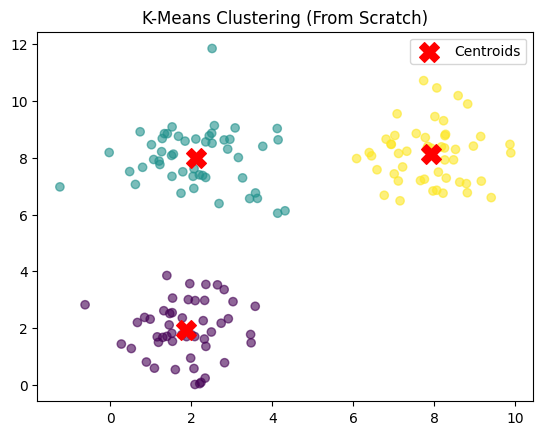

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.legend()
plt.title("K-Means Clustering (From Scratch)")
plt.show()
